0/50: ../TinyOS-Benchmark/preprocessed-dataset/
1/50: ../TinyOS-Benchmark/preprocessed-dataset/RadioSenseToLeds
2/50: ../TinyOS-Benchmark/preprocessed-dataset/TCPEcho
3/50: ../TinyOS-Benchmark/preprocessed-dataset/MultihopOscilloscope
4/50: ../TinyOS-Benchmark/preprocessed-dataset/tests
5/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLpl
6/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/RadioStress
7/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed
8/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLedSingle
9/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/BlinkLed
10/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/MultiLed
11/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/TestLed/LedColor
12/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420
13/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/TestAcks
14/50: ../TinyOS-Benchmark/preprocessed-dataset/tests/cc2420/LplBroadcastCountToLeds
15/50: ../TinyOS-Benc

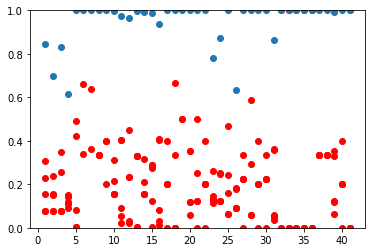

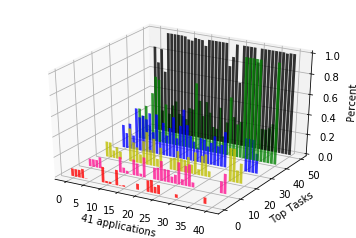

In [13]:
#-*- coding: utf-8 -*-
import pickle
import os
import gc

def containlogfile(folder):
    ''' Does the folder contain log file?
    Args:
        folder: str
    '''
    
    for e in os.listdir(folder):
        if '.pkl' in e:
            return True        
    return False

data_path = '../TinyOS-Benchmark/preprocessed-dataset/'
paths_data = {}
paths = list(os.walk(data_path))
for i in range(len(paths)):
    #if i > 18: break
    print('{}/{}: {}'.format(i, len(paths), paths[i][0]))
    if containlogfile(paths[i][0]) and paths[i][0] not in paths_data:
        paths_data[paths[i][0]] = []
    for e2 in paths[i][2]:
        fn = os.path.join(paths[i][0], e2)
        with open(fn, 'rb') as f:
            paths_data[paths[i][0]] += pickle.load(f)


def most_tasks(ls, num=5):
    ''' shoot tasks make up the majority in the logs
    Args:
        ls: list, logs look [(timestamp, taskid) ...]
        num: int, the top of task
    Retval:
        ([(taskid, number, precent) ... num], allprecent, num)
        allprecent is the sum of each prcent in the first item precents  
        num is the number of tasks, len(ls) yet.
    '''
    count = {}
    for e in ls:
        if e[1] in count:
            count[e[1]] += 1
        else:
            count[e[1]] = 1

    count = list(map(lambda k: (k, count[k]), count.keys()))
    count = sorted(count, key=lambda e: e[1], reverse=True)
    #count = list(map(lambda e: (e[0], e[1],  # using round to calculate the precent of tasks
    #                 round(float(e[1]) / len(ls), 2)), count))
    # no round() function
    count = list(map(lambda e: (e[0], e[1], 
                    float(e[1]) / len(ls), 2), count))    
    return count[:num], sum(map(lambda e: e[2], count[:num])), len(ls)


###################### 2d ######################################
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

plt.figure(0)
top_task_num = 5
y = []
idx = 1 #
for k, v in paths_data.items():
    retval = most_tasks(v, top_task_num)
    for e in map(lambda e: e[2], retval[0]):
        plt.plot([idx], [e], marker='o', color='r')
    idx += 1
    y.append(sum(map(lambda e: e[2], retval[0])))
plt.ylim(0, 1)
plt.plot(list(range(1, len(y) + 1)), y, marker='o', linestyle=' ')

plt.savefig('feature-by-frequency-2d.png')
plt.show()  
plt.close(0)

###################### 3d ######################################
prob = [[] for i in range(top_task_num)]
for k, v in paths_data.items():
    retval = most_tasks(v, top_task_num)
    #temp = list(map(lambda e: e[2], retval[0]))
    for i in range(top_task_num):
        if i >= len(retval[0]):
            prob[i].append(0.0)
        else:
            prob[i].append(retval[0][i][2])
plus_prob = []    
for i in range(len(prob[0])):
    plus_prob.append(sum(map(lambda e: e[i], prob)))
prob.insert(0, plus_prob)

fig = plt.figure(1)
#plt.rcParams['font.sans-serif']=['SimHei']
ax = fig.gca(projection='3d')
idx = 0
for c, z in zip(['k', 'g', 'b', 'y', 'deeppink', 'r'], [50, 40, 30, 20, 10, 0]):
    xs = np.arange(len(prob[0]))
    ys = prob[idx]
    idx += 1
    #ys = np.random.rand(20)
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)
    
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('{} applications'.format(len(prob[0])))
ax.set_ylabel('Top Tasks')
ax.set_zlabel('Percent')
plt.savefig('feature-by-frequency-3d.png')
plt.show()
plt.close(1)



20 [('r', 30), ('g', 20), ('b', 10), ('y', 0)]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 30 ['c', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
20 [('r', 30), ('g', 20), ('b', 10), ('y', 0)]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 20 ['c', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g']
20 [('r', 30), ('g', 20), ('b', 10), ('y', 0)]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 10 ['c', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
20 [('r', 30), ('g', 20), ('b', 10), ('y', 0)]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 0 ['

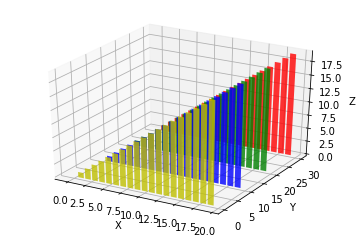

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.arange(20)
    #ys = np.random.rand(20)
    print(len(ys), list(zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0])))
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    print(xs, ys, z, cs)
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()
